# Gronwall-type estimate for the stochastic case


$$
dz_t = f(z_t,t) dt \\
dx_t = f(x_t,t) dt + \epsilon g(x_t,t) dt + \epsilon \sigma(x_t,t) dW_t
$$

Define the difference between the two processes as 

$$
y_t : = |x_t - z_t|^2 = |\int_{t_0}^t f(x_s, s) ds - \int_{t_0}^t f(z_s,s)ds + \epsilon \int_{t_0}^t g(x_s, s)ds + \epsilon \int_{t_0}^t \sigma(x_s, s)dW_s|^2
$$

By Cauchy-Schwarz: $||\sum_i^n x_i||^2 = ||\sum_i^nx_i \cdot 1||^2 \leq \sum x_i^2 \cdot \sum 1 = n \sum x_i^2$


$$v(t):= E(y_t) \leq 3E\left[\left(\int_{t_0}^t (f(x_s,s) - f(z_s,s)) ds \right)^2 + \epsilon^2 \left(\int_{t_0}^tg(x_s,s)ds \right)^2 + \epsilon^2 \left(\int_{t_0}^t \sigma(x_s,s)dW_s\right)^2 \right] = $$

$$
=3E\left[\left(\int_{t_0}^t (f(x_s,s) - f(z_s,s)) ds \right)^2\right] + 3\epsilon^2 E\left[ \left(\int_{t_0}^tg(x_s,s)ds \right)^2\right] + 3\epsilon^2 E \left[ \left(\int_{t_0}^t \sigma(x_s,s)dW_s\right)^2 \right]\leq
$$
By Cauchy-Schwartz in the first two terms and the Ito-Isometry in the last:
$$
\leq 3(t-t_0)\int_{t_0}^t E(|f(x_s,s) - f(z_s,s)|^2) ds  + 3\epsilon^2(t-t_0) \int_{t_0}^t E (|g(x_s,s)|^2)ds + 3\epsilon^2 \int_{t_0}^t E[Tr(\sigma(x_s,s)^T\sigma(x_s,s))]ds \leq
$$

$f$ is Lipschitz, with Lipschitz constant $L$, $E (|g(x_s,s)|^2) \leq \Delta^2$ and $E[Tr(\sigma(x_s,s)^T\sigma(x_s,s))] \leq \Delta^2_\sigma$.

$$
v(t) \leq 3(t-t_0)L^2\int_{t_0}^t v(s) ds + 3\epsilon^2 (t-t_0)^2 \Delta^2 + 3\epsilon^2(t-t_0)\Delta^2_\sigma
$$


### The Gronwall-inequality states:
If 
$$
x(t) \leq h(t) + \int_{t_0}^t k(s)x(s) ds,
$$
then

$$v(t) \leq h(t) + \int_{t_0}^th(s)k(s)e^{\int_{s}^t k(u) du}ds.$$ Now, put 

$x = v = E(y_t)$, $k(s) = 3(t-t_0)L^2$, $h(t) =3\epsilon^2 (t-t_0)^2 \Delta^2 + 3\epsilon^2(t-t_0)\Delta^2_\sigma $

In [2]:
from sympy import init_printing
init_printing()
import numpy as np

import matplotlib.pyplot as plt
from sympy import init_session
init_session()
s, t, t0 = symbols('s t t0')
L, Delta, Delta_s = symbols('L Delta Delta_s')
epsilon = Symbol('epsilon')

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [3]:
k = 3*(t-t0)*L**2
h = 3*epsilon**2 * (s-t0)**2 *Delta**2 + 3*epsilon**2 * (s-t0)*Delta_s**2


In [4]:
h

In [5]:
u = Symbol('u')
exponent = integrate(k, (u, s, t))

In [6]:
simplify(k*(t-s))

In [7]:
exponent

In [8]:
RHS = h.subs(s, t) + k*integrate(h*exp(exponent), (s, t0,t))

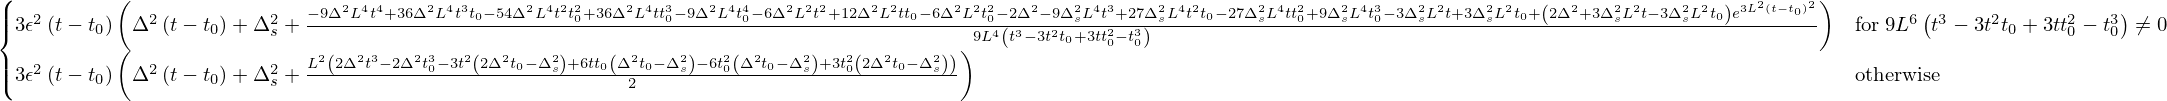

In [9]:
simplify(RHS)

In [10]:
RHS.free_symbols

In [11]:
RHS_numeric = lambdify((Delta,Delta_s,L,epsilon,t, t0), RHS, 'numpy')

In [15]:
def RHS_num(Delta,L,epsilon,t, t0):
    common = 3*epsilon**2 *Delta**2
    first = (t-t0)**2 + (t-t0)
    secondfactor = np.exp(3*L**2 *(t-t0))
    integral = 3*np.exp((t-t0))-(t-t0)**2-3*(t-t0+1)
    return common*(first + secondfactor*integral)

In [12]:
%matplotlib inline

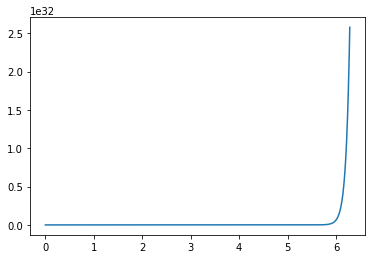

In [16]:
times = np.linspace(0, 2*np.pi, 10000)
plt.plot(times, RHS_num(1, 2, 0.01, times, 0), '-')
